In [2]:
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
import cmdstanpy as cmds
import numpy as np
import scipy as sp
import csv
import os

# Exercise 1

In [3]:
data1 = pd.read_csv('Data1.csv', index_col=0, header=0, parse_dates=[0])
data1.head()

,theta_1,theta_2,theta_3,theta_4,theta_5,theta_6
2017-01-01,0.756936,-1.467790,0.096136,-0.115306,-0.447908,0.902579
2017-01-02,0.767089,0.185797,-1.428536,-0.086443,-0.954288,1.930909
2017-01-03,0.404544,1.415887,0.443466,0.000200,-0.892351,2.449691
2017-01-04,1.313957,-1.804471,-0.836986,0.011785,-1.012518,1.182085
2017-01-05,0.209862,1.315868,0.140993,-0.046473,-1.417092,1.742433


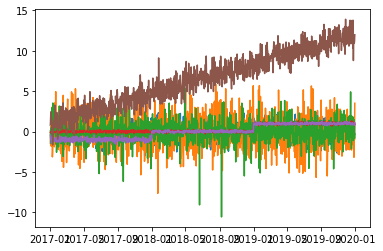

In [33]:
plt.plot(data1);

#fig, axs = plt.subplots(2, 3, sharey=True, tight_layout=True)
#axs = axs.flatten()
#axs[0].hist(data1)
#axs[1].hist(data1)
plt.hist(data1, bins = 20)

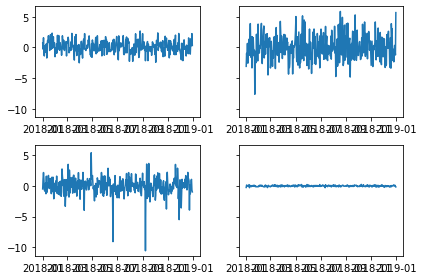

In [5]:
fig, axs = plt.subplots(2, 2, sharey=True, tight_layout=True)
axs = axs.flatten()
i = 0
for col_name in data1.columns:
    if col_name == "theta_5":
        break
    col = data1[col_name]
    axs[i].plot(col.loc['2018-1-1':'2018-12-31'])
    i+=1

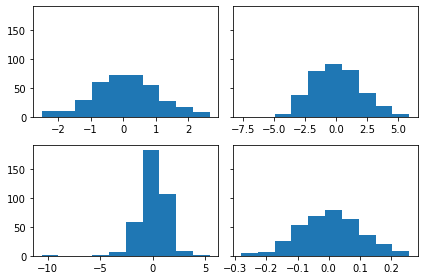

In [6]:
fig, axs = plt.subplots(2, 2, sharey=True, tight_layout=True)
axs = axs.flatten()
i = 0
for col_name in data1.columns:
    if col_name == "theta_5":
        break
    col = data1[col_name]
    axs[i].hist(col.loc['2018-1-1':'2018-12-31'])
    i+=1

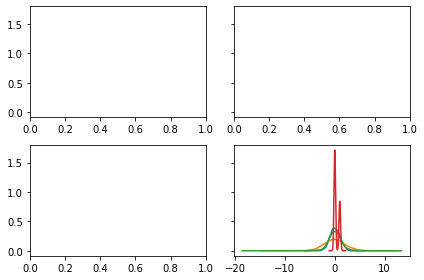

In [7]:
fig, axs = plt.subplots(2, 2, sharey=True, tight_layout=True)
axs = axs.flatten()
i = 0
col = list()
for col_name in data1.columns:
    if col_name == "theta_5":
        break
    col.append(data1[col_name])
    axs[i] = col[i].plot.kde()
    i+=1

# Exercise 2 

In [15]:
data_ny = {"N": 9,
       "y": [0, 0, 0, 0, 0, 1, 1, 1, 1]}

In [16]:
stan = cmds.CmdStanModel(stan_file='bern_1.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [18]:
result = stan.sample(data=data_ny)

INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


       Mean   MCSE  StdDev    5%  95%   N_Eff  N_Eff/s  R_hat
name                                                         
lp__  -8.10  0.019    0.79 -9.60 -7.6  1600.0  16000.0    1.0
theta  0.46  0.004    0.15  0.22  0.7  1300.0  12000.0    1.0


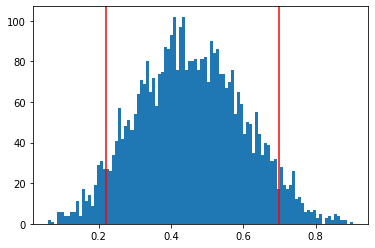

In [32]:
statistics = result.summary([5, 95])
print(statistics)
plt.hist(result.stan_variable('theta'), bins=100);
plt.axvline(x=statistics['5%']['theta'], color = 'r');
plt.axvline(x=statistics['95%']['theta'], color = 'r');